In [375]:
# I confirm that I did not use ChatGPT or codes from the web or from past years’ assignments and that the work I submit is my own and my own only 

### Question 1

For each mass$ \ m_i\ $, we apply Newton's second law, which states:
$$
m_i \frac{d^2 x_i}{dt^2} = F_{\text{net, } i}
$$
where $ \ F_{\text{net, } i} \ $ is the net force acting on$ \ m_i \ $due to the neighboring springs. 

Assuming that each spring follows Hooke's law, the force is given by $ \ F = -k \Delta x \ $, where$ \ k \ $is the spring constant and $ \ \Delta x \ $is the displacement from the equilibrium position of the spring. We consider displacement to the right to be positive.

In this setup, each$ \ x_i \ $ represents the displacement of the mass$ \ m_i \ $from its equilibrium position at time $ t $

#### Equation for$\ m_1 \ $

The forces acting on$\ m_1 \ $ are:
- **Left spring**:$\ -k_1 x_1 \ $ (pulling it towards the wall if displaced to the right)
- **Right spring**:$\ -k_2 (x_1 - x_2) \ $ (depends on the relative displacement of $\ m_1 \ $ and $\ m_2 \ $)

Thus, the equation of motion for$\ m_1 \ $ is:
$$
m_1 \frac{d^2 x_1}{dt^2} = -k_1 x_1 - k_2 (x_1 - x_2) = -k_1 x_1 - k_2 x_1 + k_2 x_2
$$

#### Equation for$\ m_2 \ $

The forces acting on$\ m_2 \ $are:
- **Left spring**:$\ k_2 (x_1 - x_2) \ $
- **Right spring**:$\ -k_3 (x_2 - x_3) \ $

So, the equation of motion for $\ m_2 \ $ is:
$$
m_2 \frac{d^2 x_2}{dt^2} = k_2 (x_1 - x_2) - k_3 (x_2 - x_3) = k_2 x_1 - k_2 x_2 + k_3 x_3 - k_3 x_2
$$

#### Equation for$\ m_3 \ $

The forces acting on$\ m_3 \ $are:
- **Left spring**: $\ k_3 (x_2 - x_3) \ $
- **Right spring**: $\ -k_4 x_3 \ $ (pulling it back toward the wall if displaced to the right)

Thus, the equation of motion for$\ m_3 \ $is:
$$
m_3 \frac{d^2 x_3}{dt^2} = k_3 (x_2 - x_3) - k_4 x_3 = k_3 x_2 - k_3 x_3 - k_4 x_3
$$

### Question 2

We assume harmonic motion for each mass, with $\ x_i(t) = A_i \sin(\omega t) \ $
This implies that:
$$
\frac{d^2 x_i}{dt^2} = -\omega^2 x_i(t)
$$
Substituting this into each equation of motion, we obtain (all the $\sin(t)\ $ terms cancel out):

1. **For $\ m_1 \ $:**
   $$
   -\omega^2 m_1 A_1 = -k_1 A_1 + k_2 (A_2 - A_1) = -k_1 A_1 + k_2 A_2 - k_2 A_1
   $$

2. **For $\ m_2 \ $:**
   $$
   -\omega^2 m_2 A_2 = -k_2 (A_2 - A_1) + k_3 (A_3 - A_2) = -k_2 A_2 + k_2 A_1 + k_3 A_3 - k_3 A_2
   $$

3. **For $\ m_3 \ $:**
   $$
   -\omega^2 m_3 A_3 = -k_3 (A_3 - A_2) - k_4 A_3 = -k_3 A_3 + k_3 A_2 - k_2 A_3
   $$

Rearranging these equations, we can write this system in matrix form as:
$$
\begin{bmatrix}
k_1 + k_2 - m_1 w^2 & -k_2 & 0 \\
-k_2 & k_2 + k_3 - m_2 w^2 & -k_3 \\
0 & -k_3 & k_3 + k_4 - m_3 w^2
\end{bmatrix}
\times
\begin{bmatrix}
A_1 \\
A_2 \\
A_3
\end{bmatrix}
=
0
$$

In [378]:
# Question 3
# Rewrite the equation for the diagonal as (K - w^2 M)*A = 0 
# This then becomes K*A = w^2 * M * A

import numpy as np

m1, m2, m3 = 40, 20, 30
k1, k2, k3, k4 = 200, 100, 150, 250

# Construct the k stiffness matrix
K = np.array([
    [k1 + k2,    -k2,        0],
    [-k2,     k2 + k3,     -k3],
    [0,         -k3,    k3 + k4]
])

M = np.array([
    [m1, 0,  0],
    [0, m2,  0],
    [0,  0, m3]
])

# Solve generalized eigenvalue problem: KA = ω²MA
# This is equivalent to solving (M⁻¹K)A = ω²A
M_inv = np.linalg.inv(M)
matrix = np.dot(M_inv, K)

eigenvalues, eigenvectors = np.linalg.eig(matrix)

idx = eigenvalues.argsort()
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Calculate natural frequencies (w = √λ) as each eigenvalue is w^2
natural_frequencies = np.sqrt(eigenvalues)

print("Natural frequencies (rad/s):")
for i, freq in enumerate(natural_frequencies, 1):
    print(f"ω{i} = {freq:.3f}")

print("\nEigenvectors (mode shapes):")
for i in range(3):
    # Normalize eigenvector
    normalized = eigenvectors[:, i] / np.max(np.abs(eigenvectors[:, i]))
    print(f"\nMode {i+1}:")
    print(f"A1 = {normalized[0]:.3f}")
    print(f"A2 = {normalized[1]:.3f}")
    print(f"A3 = {normalized[2]:.3f}")

Natural frequencies (rad/s):
ω1 = 2.086
ω2 = 3.069
ω3 = 4.423

Eigenvectors (mode shapes):

Mode 1:
A1 = 0.794
A2 = 1.000
A3 = 0.557

Mode 2:
A1 = -1.000
A2 = 0.768
A3 = 0.982

Mode 3:
A1 = 0.207
A2 = -1.000
A3 = 0.803


### Question 4
In a vibrational system, the equation 
$\ x_i(t) = A_i \sin(\omega t) \ $
represents the motion of each mass $\ i \ $ as a function of time. Here:

- $\ A_i \ $ corresponds to the amplitude of motion for each mass, which is given by the entries of the eigenvector corresponding to each mode.
- $\ \omega \ $ is the natural frequency of the mode, which is the square root of the eigenvalue $\ \lambda \ $ (i.e., $ \omega = \sqrt{\lambda} )$.

Each mode has an associated natural frequency and an eigenvector that defines the relative amplitude (or mode shape) of each mass in that mode. When the system vibrates at a particular natural frequency, each mass will oscillate with an amplitude proportional to its corresponding entry in the mode shape eigenvector.


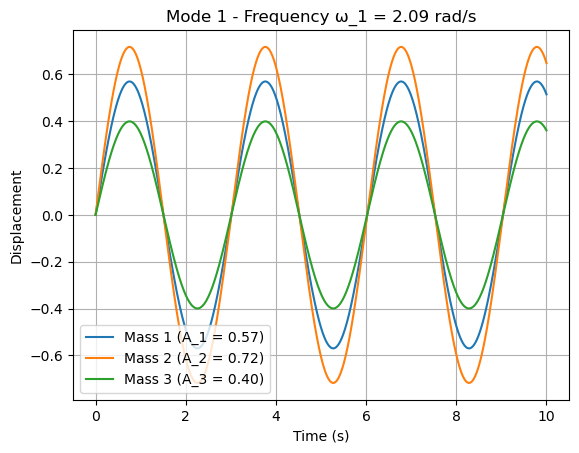

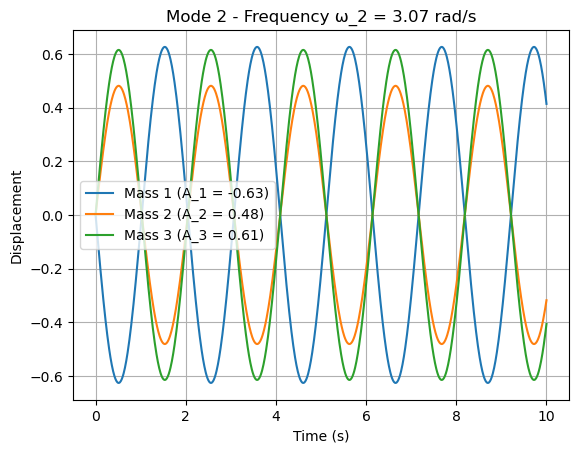

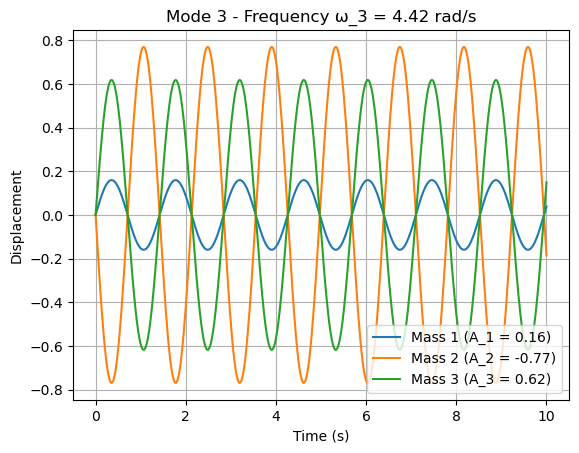

In [380]:
# Question 5

import matplotlib.pyplot as plt

t = np.linspace(0, 10, 1000) # vector plot to 10s
for mode in range(3):
    plt.figure()
    for mass in range(3):
        A_i = eigenvectors[mass, mode]
        omega = natural_frequencies[mode]
        x_i_t = A_i * np.sin(omega * t)
        plt.plot(t, x_i_t, label=f'Mass {mass + 1} (A_{mass + 1} = {A_i:.2f})')
    plt.title(f"Mode {mode + 1} - Frequency ω_{mode + 1} = {natural_frequencies[mode]:.2f} rad/s")
    plt.xlabel("Time (s)")
    plt.ylabel("Displacement")
    plt.legend()
    plt.grid()
    plt.show()

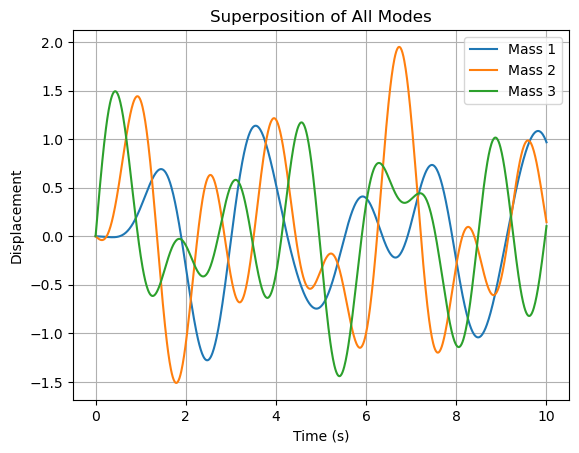

In [381]:
# Question 6: Superposition of Modes
# Combine all three modes with equal weight for demonstration
x_superposition = np.zeros((3, len(t)))
for mode in range(3):
    omega = natural_frequencies[mode]
    for mass in range(3):
        A_i = eigenvectors[mass, mode]
        x_superposition[mass, :] += A_i * np.sin(omega * t)

# Plot superposition of modes for each mass
plt.figure()
for mass in range(3):
    plt.plot(t, x_superposition[mass, :], label=f'Mass {mass + 1}')
plt.title("Superposition of All Modes")
plt.xlabel("Time (s)")
plt.ylabel("Displacement")
plt.legend()
plt.grid()
plt.show()

In [382]:
# Question 7 --> my report is submitted additionally on the canvas assignment